In [1]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import difflib

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

# B3.1 Principle ONE SHOT

## Notebook to evaluate GPT-annotate results

Codebooks:
- B3.0: zero shot
- B3.1: one shot
- B3.0.1: zero shot with specific inclusion of context
- B3.1.1: one shot with specific inclusion of context

Test for 5 different seeds [3644,3441, 280, 5991, 7917]
> Refer to these as S1-5

Batch of 20 sentences
1 Iteration.

Main outcomes: T0 - I1
For testing purposes: (T 0.6 I1 - T 0 I3)

FINGERPRINT USED: fp_319be4768e


In [2]:
# Basic stats of train dataset:
HLS_train = pd.read_csv('data/string/HLS_train_string.csv')

In [3]:
HLS_train['PRINCIPLE'].value_counts()

not evaluated                  992
prioritarian                    66
utilitarian                     59
egalitarian                     52
general normative statement     34
sufficientarian                  8
libertarian                      1
Name: PRINCIPLE, dtype: int64

# 1. Results B3.0

### 1. Import Results
Results created under the same fingerprint are saved in a CSV file for each seed. All results are combined into one dataset.

In [4]:
#B1.0
path_B3 = 'STRING_RESULT/B3.1/all_iterations'

# Open all dataframes
S1 = pd.read_csv(f'{path_B3}/all_iterations_string_T0_3644.csv')
S2 = pd.read_csv(f'{path_B3}/all_iterations_string_T0_3441.csv')
S3 = pd.read_csv(f'{path_B3}/all_iterations_string_T0_280.csv')
S4 = pd.read_csv(f'{path_B3}/all_iterations_string_T0_5991.csv')
S5 = pd.read_csv(f'{path_B3}/all_iterations_string_T0_7917.csv')

seeds_B3 = {
    "S1": [S1],
    "S2": [S2],
    "S3": [S3],
    "S4": [S4],
    "S5": [S5]
}

### 2. Evaluate missed batches

In [5]:
# Evaluate missed batches
B3_missed = pd.read_csv('STRING_RESULT/B3.1/T0_missed_batches.csv')
B3_missed

,Unnamed: 0,Missed batch
0,0,3441 - I1 - B18
1,1,280 - I1 - B22
2,2,7917 - I1 - B13
3,3,7917 - I1 - B55
4,4,3644 - I1 - B5
5,5,5991 - I1 - B52


Evaluate missed batches

## 2. Evaluate metrics
Evaluation is performed with SKLEARN - presenting 5 classification reports

Column RELEVANCE_x is the ground truth label - RELEVANCE_y is the predicted label

Save as dataframes - if neccessary

In [6]:
print(classification_report(S1['PRINCIPLE_x'],S1['PRINCIPLE_y']))

                             precision    recall  f1-score   support

                egalitarian       0.43      0.62      0.50        52
general normative statement       0.12      0.79      0.20        34
                libertarian       0.20      1.00      0.33         1
              not evaluated       0.99      0.65      0.79       976
               prioritarian       0.39      0.68      0.49        65
            sufficientarian       0.45      0.71      0.56         7
                utilitarian       0.27      0.53      0.36        57

                   accuracy                           0.65      1192
                  macro avg       0.41      0.71      0.46      1192
               weighted avg       0.87      0.65      0.72      1192



In [7]:
print(classification_report(S2['PRINCIPLE_x'],S2['PRINCIPLE_y']))

                             precision    recall  f1-score   support

                egalitarian       0.44      0.60      0.50        52
general normative statement       0.10      0.76      0.18        34
                libertarian       0.20      1.00      0.33         1
              not evaluated       0.99      0.64      0.78       992
               prioritarian       0.39      0.67      0.49        66
            sufficientarian       0.46      0.75      0.57         8
                utilitarian       0.29      0.54      0.38        59

                   accuracy                           0.64      1212
                  macro avg       0.41      0.71      0.46      1212
               weighted avg       0.87      0.64      0.71      1212



In [8]:
print(classification_report(S3['PRINCIPLE_x'],S3['PRINCIPLE_y']))

                             precision    recall  f1-score   support

                egalitarian       0.42      0.62      0.50        52
general normative statement       0.11      0.74      0.18        34
                libertarian       0.20      1.00      0.33         1
              not evaluated       0.99      0.65      0.79       992
               prioritarian       0.38      0.62      0.47        66
            sufficientarian       0.46      0.75      0.57         8
                utilitarian       0.29      0.58      0.39        59

                   accuracy                           0.65      1212
                  macro avg       0.41      0.71      0.46      1212
               weighted avg       0.87      0.65      0.72      1212



In [9]:
print(classification_report(S4['PRINCIPLE_x'],S4['PRINCIPLE_y']))

                                        precision    recall  f1-score   support

                PRINCIPLE: egalitarian       0.00      0.00      0.00         0
PRINCIPLE: general normative statement       0.00      0.00      0.00         0
              PRINCIPLE: not evaluated       0.00      0.00      0.00         0
                           egalitarian       0.39      0.58      0.47        52
           general normative statement       0.11      0.76      0.19        34
                           libertarian       0.25      1.00      0.40         1
                         not evaluated       0.99      0.64      0.78       973
                          prioritarian       0.36      0.59      0.45        66
                       sufficientarian       0.42      0.62      0.50         8
                           utilitarian       0.30      0.55      0.39        58

                              accuracy                           0.64      1192
                             macro avg

C:\App\Python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\App\Python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\App\Python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
S4['PRINCIPLE_y'].value_counts()

not evaluated                             631
general normative statement               235
prioritarian                              108
utilitarian                               106
egalitarian                                76
PRINCIPLE: not evaluated                   14
sufficientarian                            12
libertarian                                 4
PRINCIPLE: egalitarian                      4
PRINCIPLE: general normative statement      2
Name: PRINCIPLE_y, dtype: int64

In [11]:
# Remove principle prefix from S4
S4['PRINCIPLE_y'] = S4['PRINCIPLE_y'].str.replace('PRINCIPLE: ',"")

In [12]:
S4['PRINCIPLE_y'].value_counts()

not evaluated                  645
general normative statement    237
prioritarian                   108
utilitarian                    106
egalitarian                     80
sufficientarian                 12
libertarian                      4
Name: PRINCIPLE_y, dtype: int64

In [13]:
print(classification_report(S4['PRINCIPLE_x'],S4['PRINCIPLE_y']))

                             precision    recall  f1-score   support

                egalitarian       0.40      0.62      0.48        52
general normative statement       0.11      0.76      0.19        34
                libertarian       0.25      1.00      0.40         1
              not evaluated       0.99      0.66      0.79       973
               prioritarian       0.36      0.59      0.45        66
            sufficientarian       0.42      0.62      0.50         8
                utilitarian       0.30      0.55      0.39        58

                   accuracy                           0.65      1192
                  macro avg       0.40      0.69      0.46      1192
               weighted avg       0.87      0.65      0.72      1192



This batch has something wrong with saving results

In [14]:
print(classification_report(S5['PRINCIPLE_x'],S5['PRINCIPLE_y']))

                             precision    recall  f1-score   support

                egalitarian       0.39      0.56      0.46        52
general normative statement       0.10      0.74      0.18        34
                libertarian       0.25      1.00      0.40         1
              not evaluated       0.99      0.65      0.78       992
               prioritarian       0.37      0.62      0.47        66
            sufficientarian       0.50      0.75      0.60         8
                utilitarian       0.29      0.54      0.37        59

                   accuracy                           0.64      1212
                  macro avg       0.41      0.69      0.47      1212
               weighted avg       0.87      0.64      0.71      1212



Metrics over 5 seeds are very similar.
Macro avg: average of all classes (aka labels)
Weighted avg: weighted average, taking class balances into account.

In [15]:
# Assuming S1, S2, S3, S4, and S5 are your dataframes
dataframes = [S1, S2, S3, S4, S5]
report_dfs = []

# Generate a classification report for each dataframe and convert it to a dataframe
for i, df in enumerate(dataframes):
    report = classification_report(df['PRINCIPLE_x'], df['PRINCIPLE_y'], output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    report_df['source'] = f"S{i+1}"  # Add a source column to identify the original dataframe
    report_dfs.append(report_df)

# Concatenate all classification report dataframes
all_reports_df = pd.concat(report_dfs).reset_index()

# Calculate the mean and standard deviation for each metric, excluding the support column
metrics = all_reports_df.columns.difference(['index', 'source', 'support'])
mean_df = all_reports_df[metrics].groupby(all_reports_df['index']).mean()
std_df = all_reports_df[metrics].groupby(all_reports_df['index']).std()

# Print the results
print("Mean of each metric:")
print(mean_df)
print("\nStandard Deviation of each metric:")
print(std_df)

Mean of each metric:
                             f1-score  precision    recall
index                                                     
accuracy                     0.645708   0.645708  0.645708
egalitarian                  0.489133   0.413107  0.600000
general normative statement  0.186926   0.106609  0.758824
libertarian                  0.360000   0.220000  1.000000
macro avg                    0.461438   0.407431  0.701379
not evaluated                0.784326   0.989184  0.649778
prioritarian                 0.472653   0.376383  0.635385
sufficientarian              0.559683   0.458858  0.717857
utilitarian                  0.377344   0.287876  0.547811
weighted avg                 0.716124   0.867797  0.645708

Standard Deviation of each metric:
                             f1-score  precision    recall
index                                                     
accuracy                     0.005107   0.005107  0.005107
egalitarian                  0.019759   0.020086  0.025074

## 3. Confusion matrix
Evaluate where misclassifications are found - Again for each seed. - account for wrong saves for seed 4

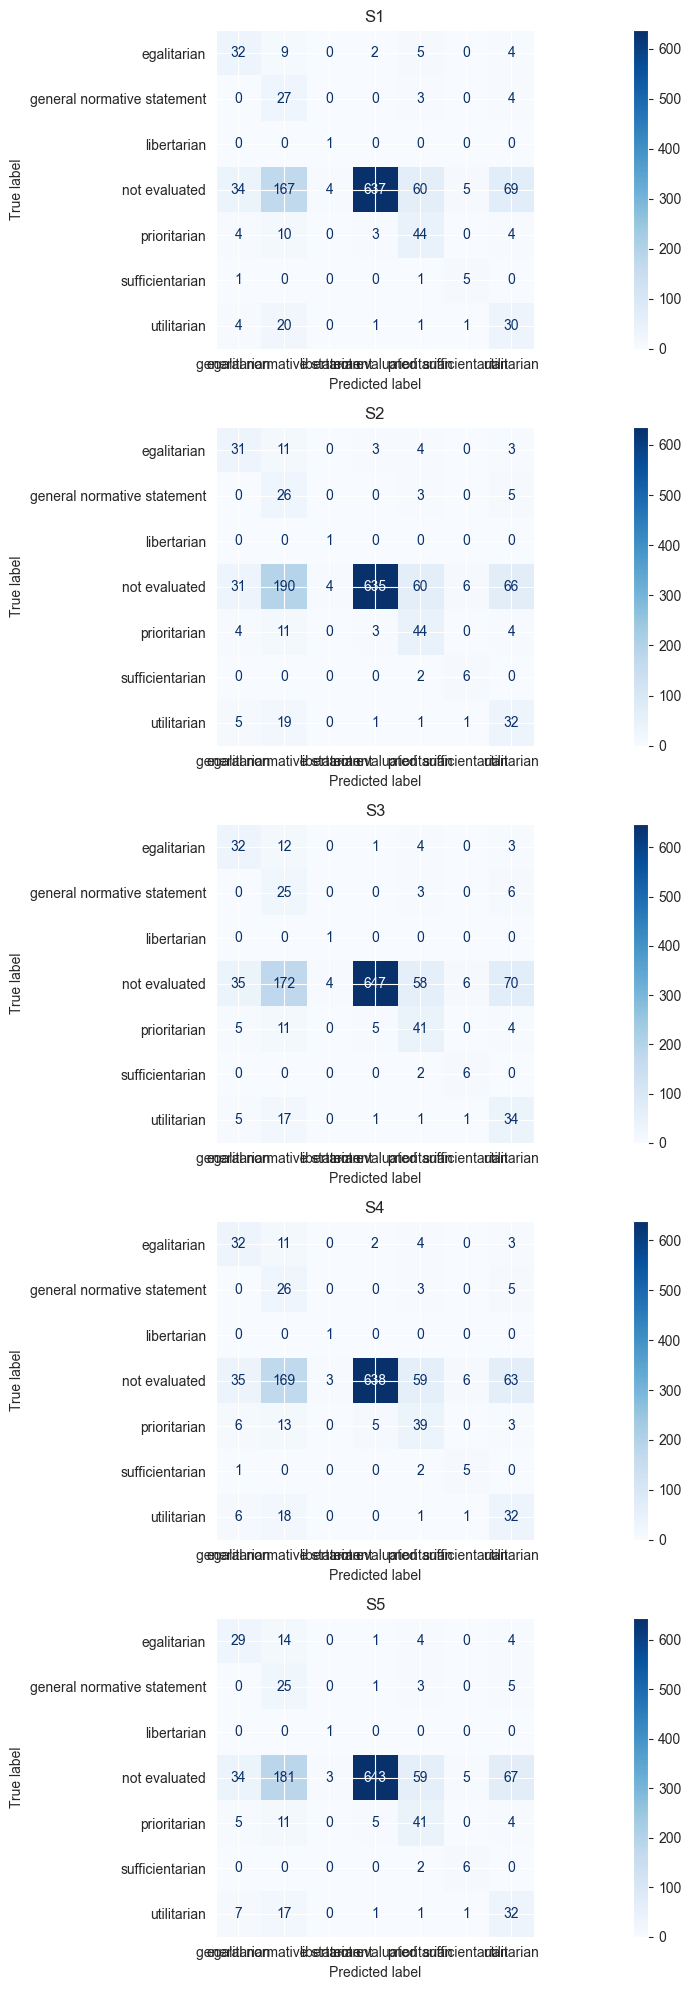

In [16]:
labels = ['egalitarian', 'general normative statement', 'libertarian','not evaluated',
          'prioritarian', 'sufficientarian', 'utilitarian']
# Number of plots
num_plots = len(seeds_B3)
# Create plot names
plot_names = list(seeds_B3.keys())

# Create subplots
fig, axes = plt.subplots(num_plots, 1, figsize=(20, 20))

# Visualize the confusion matrix
for i, name in enumerate(plot_names):
    df = seeds_B3[name][0]  # Access the dataframe
    cm = confusion_matrix(df['PRINCIPLE_x'], df['PRINCIPLE_y'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=plt.cm.Blues, ax=axes[i])
    axes[i].set_title(name)

# Adjust layout
plt.tight_layout()
plt.show()

## 4. Evaluate misclassifications of sentences
Special interest in relevant sentences that are incorrectly classified. Evaluate if the same sentences are misclassified in each seed

In [17]:
# Test label and seed nr to all dataframes
B3 = [S1, S2, S3, S4, S5]

# Corresponding seed numbers
label =  ['S1 3644','S2 3441','S3 280', 'S4 5991', 'S5 7917']

# Adding the seed number column to each dataframe
for i, df in enumerate(B3):
    df['Seed'] = label[i]

In [18]:
B3_all = pd.concat([S1, S2, S3, S4, S5], axis=0, ignore_index=True)
B3_all_sorted = B3_all.sort_values('unique_id')
B3_all_sorted.shape

(6020, 7)

In [19]:
# I want to evaluate consistency
# Print all rows where inconsequences are found per seed
# Define a function to check if all values in relevance_y are the same
def relevance_y_not_uniform(group):
    return group['PRINCIPLE_y'].nunique() != 1

# Group by 'ID' and filter groups
B3_consistency = B3_all_sorted.groupby('unique_id').filter(relevance_y_not_uniform)

print("\nFiltered DataFrame (where relevance_y is not the same for all rows within each unique ID):")
B3_consistency.head(100)


Filtered DataFrame (where relevance_y is not the same for all rows within each unique ID):


,unique_id,text,PRINCIPLE_x,llm_query,PRINCIPLE_y,iteration,Seed
4837,29,"Second, Japan will promote the application of ...",not evaluated,"29 Second, Japan will promote the application ...",general normative statement,1,S5 7917
29,29,"Second, Japan will promote the application of ...",not evaluated,"29 Second, Japan will promote the application ...",general normative statement,1,S1 3644
1221,29,"Second, Japan will promote the application of ...",not evaluated,"29 Second, Japan will promote the application ...",general normative statement,1,S2 3441
2433,29,"Second, Japan will promote the application of ...",not evaluated,"29 Second, Japan will promote the application ...",not evaluated,1,S3 280
3645,29,"Second, Japan will promote the application of ...",not evaluated,"29 Second, Japan will promote the application ...",general normative statement,1,S4 5991
...,...,...,...,...,...,...,...
4996,188,Developed countries should take the lead in in...,prioritarian,188 Developed countries should take the lead i...,egalitarian,1,S5 7917
5000,192,"I also welcome , and indeed recognise pledges...",prioritarian,"192 I also welcome , and indeed recognise ple...",not evaluated,1,S5 7917
2596,192,"I also welcome , and indeed recognise pledges...",prioritarian,"192 I also welcome , and indeed recognise ple...",not evaluated,1,S3 280
3808,192,"I also welcome , and indeed recognise pledges...",prioritarian,"192 I also welcome , and indeed recognise ple...",not evaluated,1,S4 5991


In [20]:
# Count unique values in Unique_id column of B1 consistency to see how many sentences are inconsistently labelled
print('There are inconsistent labels given for', len(B3_consistency['unique_id'].unique()), 'sentences.')

There are inconsistent labels given for 137 sentences.


# 2. Results B3.1.1 - one shot with context
Only seed S1-S3 available. Others are not saved correctly

In [21]:
#B1.0
path_B311 = 'STRING_RESULT/B3.1.1/all_iterations'

# Open all dataframes
# Open all dataframes
S1_311 = pd.read_csv(f'{path_B311}/all_iterations_string_T0_3644.csv')
S2_311 = pd.read_csv(f'{path_B311}/all_iterations_string_T0_3441.csv')
S3_311 = pd.read_csv(f'{path_B311}/all_iterations_string_T0_280.csv')
S4_311 = pd.read_csv(f'{path_B311}/all_iterations_string_T0_5991.csv')
S5_311 = pd.read_csv(f'{path_B311}/all_iterations_string_T0_7917.csv')


seeds_B311 = {
    "S1": [S1_311],
    "S2": [S2_311],
    "S3": [S3_311],
    "S4": [S4_311],
    "S5": [S5_311],
}

### 2. Evaluate missed batches

In [22]:
# Evaluate missed batches
B311_missed = pd.read_csv('STRING_RESULT/B3.1.1/T0_missed_batches.csv')
B311_missed

,Unnamed: 0,Missed batch
0,0,3644 - I1 - B31
1,1,3644 - I1 - B36
2,2,3644 - I1 - B51
3,3,3644 - I1 - B52
4,4,3644 - I1 - B55
5,5,3644 - I1 - B60
6,6,3441 - I1 - B1
7,7,3441 - I1 - B8
8,8,3441 - I1 - B12
9,9,3441 - I1 - B19


## 2. Evaluate metrics
Evaluation is performed with SKLEARN - presenting 5 classification reports

Column RELEVANCE_x is the ground truth label - RELEVANCE_y is the predicted label

Save as dataframes - if neccessary

In [23]:
print(classification_report(S1_311['PRINCIPLE_x'],S1_311['PRINCIPLE_y']))

                             precision    recall  f1-score   support

                egalitarian       0.38      0.56      0.45        48
general normative statement       0.11      0.69      0.19        32
                libertarian       0.33      1.00      0.50         1
              not evaluated       0.99      0.67      0.80       890
               prioritarian       0.38      0.63      0.47        62
            sufficientarian       0.46      0.75      0.57         8
                utilitarian       0.31      0.57      0.40        51

                   accuracy                           0.66      1092
                  macro avg       0.42      0.70      0.48      1092
               weighted avg       0.86      0.66      0.73      1092



In [24]:
print(classification_report(S2_311['PRINCIPLE_x'],S2_311['PRINCIPLE_y']))

                             precision    recall  f1-score   support

                egalitarian       0.42      0.60      0.50        48
general normative statement       0.12      0.70      0.20        33
                libertarian       0.00      0.00      0.00         0
              not evaluated       0.98      0.68      0.80       873
               prioritarian       0.36      0.59      0.44        63
            sufficientarian       0.29      0.67      0.40         6
                utilitarian       0.35      0.57      0.43        49

                   accuracy                           0.67      1072
                  macro avg       0.36      0.54      0.40      1072
               weighted avg       0.86      0.67      0.73      1072



C:\App\Python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\App\Python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\App\Python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
print(classification_report(S3_311['PRINCIPLE_x'],S3_311['PRINCIPLE_y']))

                             precision    recall  f1-score   support

                egalitarian       0.36      0.61      0.45        46
general normative statement       0.10      0.61      0.17        33
                libertarian       0.33      1.00      0.50         1
              not evaluated       0.98      0.67      0.80       910
               prioritarian       0.34      0.56      0.42        64
            sufficientarian       0.27      0.50      0.35         6
                utilitarian       0.33      0.56      0.41        52

                   accuracy                           0.66      1112
                  macro avg       0.39      0.64      0.44      1112
               weighted avg       0.86      0.66      0.72      1112



In [26]:
print(classification_report(S4_311['PRINCIPLE_x'],S4_311['PRINCIPLE_y']))

                             precision    recall  f1-score   support

                egalitarian       0.35      0.56      0.43        50
general normative statement       0.11      0.71      0.20        34
                libertarian       0.25      1.00      0.40         1
              not evaluated       0.98      0.67      0.80       957
               prioritarian       0.32      0.58      0.42        64
            sufficientarian       0.33      0.62      0.43         8
                utilitarian       0.32      0.52      0.40        58

                   accuracy                           0.65      1172
                  macro avg       0.38      0.67      0.44      1172
               weighted avg       0.85      0.65      0.72      1172



In [27]:
print(classification_report(S5_311['PRINCIPLE_x'],S5_311['PRINCIPLE_y']))

                             precision    recall  f1-score   support

                egalitarian       0.33      0.59      0.42        44
general normative statement       0.11      0.74      0.19        31
                libertarian       0.25      1.00      0.40         1
              not evaluated       0.98      0.67      0.80       969
               prioritarian       0.32      0.60      0.42        60
            sufficientarian       0.42      0.62      0.50         8
                utilitarian       0.32      0.53      0.40        59

                   accuracy                           0.66      1172
                  macro avg       0.39      0.68      0.45      1172
               weighted avg       0.86      0.66      0.72      1172



Ook een fout in deze opslag, met > 100 egalitarian labels - wat niet kan kloppen

In [29]:
# Assuming S1, S2, S3, S4, and S5 are your dataframes
dataframes = [S1_311, S2_311,S3_311,S4_311,S5_311]
report_dfs = []

# Generate a classification report for each dataframe and convert it to a dataframe
for i, df in enumerate(dataframes):
    report = classification_report(df['PRINCIPLE_x'], df['PRINCIPLE_y'], output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    report_df['source'] = f"S{i+1}"  # Add a source column to identify the original dataframe
    report_dfs.append(report_df)

# Concatenate all classification report dataframes
all_reports_df = pd.concat(report_dfs).reset_index()

# Calculate the mean and standard deviation for each metric, excluding the support column
metrics = all_reports_df.columns.difference(['index', 'source', 'support'])
mean_df = all_reports_df[metrics].groupby(all_reports_df['index']).mean()
std_df = all_reports_df[metrics].groupby(all_reports_df['index']).std()

# Print the results
print("Mean of each metric:")
print(mean_df)
print("\nStandard Deviation of each metric:")
print(std_df)

Mean of each metric:
                             f1-score  precision    recall
index                                                     
accuracy                     0.658122   0.658122  0.658122
egalitarian                  0.450842   0.367562  0.585254
general normative statement  0.188377   0.109160  0.687670
libertarian                  0.360000   0.233333  0.800000
macro avg                    0.441647   0.387993  0.645358
not evaluated                0.798158   0.983147  0.671771
prioritarian                 0.433688   0.342707  0.591392
sufficientarian              0.451830   0.353996  0.633333
utilitarian                  0.408636   0.326045  0.548083
weighted avg                 0.724535   0.860377  0.658122

Standard Deviation of each metric:
                             f1-score  precision    recall
index                                                     
accuracy                     0.004311   0.004311  0.004311
egalitarian                  0.027768   0.033764  0.022884

C:\App\Python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\App\Python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\App\Python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
